In [ ]:
%%capture
!apt-get update
!apt-get install libgdal-dev -y
!apt-get install python-gdal -y
!apt-get install python-numpy python-scipy -y
!pip install rasterio
!pip install fiona
!pip install geopandas
!pip install PyCRS
!pip install -i https://test.pypi.org/simple/ gis-utils-pkg-dillhicks==0.0.76


import os
from tqdm.autonotebook import tqdm
import numpy as np
import gis_utils.raster as raster
from rasterio.plot import reshape_as_image
import rasterio
from rasterio.plot import reshape_as_raster, reshape_as_image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading Data


In [ ]:
!cp /content/drive/MyDrive/srcnn/seg_tiles.zip .
!unzip seg_tiles.zip 

In [ ]:
from cv2 import resize
import cv2


def load_data(input_dir):
    lr_image_filenames = [os.path.join(input_dir, x) for x in os.listdir(input_dir) if x.endswith(".tif") and x.startswith("S2_")]

    hr_image_filenames = [os.path.join(input_dir,"hr_" + os.path.split(x)[1]) for x in lr_image_filenames]
    #Loading LR tiles (getting filenames with "hr_" removed)
    label_filenames = [os.path.join(input_dir,"label_hr_" + os.path.split(x)[1]) for x in lr_image_filenames]

    print(label_filenames)
    labels = []
    hr_images = []
    lr_images = []

    label_meta = []
    hr_image_meta = []
    lr_image_meta = []

    transforms = []
    for index in tqdm(range(len(lr_image_filenames))):
        

        label, label_meta_cur = raster.load_image(label_filenames[index])
        lr_image, lr_image_meta_cur = raster.load_image(lr_image_filenames[index])
        hr_image, hr_image_meta_cur = raster.load_image(hr_image_filenames[index])
                
        labels.append(np.squeeze(reshape_as_image(label.read())))
        lr_images.append(resize(reshape_as_image(lr_image.read()), (48,48), interpolation = cv2.INTER_AREA))
        hr_images.append(np.squeeze(reshape_as_image(hr_image.read())))
        
        
        label_meta.append(label_meta_cur)
        lr_image_meta.append(lr_image_meta_cur)
        hr_image_meta.append(hr_image_meta_cur)
        transforms.append(hr_image.transform)

    return labels, lr_images, hr_images, label_meta, lr_image_meta, hr_image_meta, lr_image_filenames, hr_image_filenames, label_filenames, transforms

In [ ]:
labels_train, lr_images_train, hr_images_train,\
labels_train_meta, lr_images_train_meta, hr_images_train_meta,\
lr_images_train_filenames, hr_images_train_filenames,\
labels_train_filenames, hr_train_transforms = load_data("train")

labels_test, lr_images_test, hr_images_test,\
labels_test_meta, lr_images_test_meta, hr_images_test_meta,\
lr_images_test_filenames, hr_images_test_filenames,\
labels_test_filenames, hr_test_transforms = load_data("test")

labels_train = np.asarray(labels_train)
lr_images_train = np.asarray(lr_images_train)
hr_images_train = np.asarray(hr_images_train)

labels_test = np.asarray(labels_test)
lr_images_test = np.asarray(lr_images_test)
hr_images_test = np.asarray(hr_images_test)


['train/label_hr_S2_psc_2018-05_site12_planetscope_optical_05_05.tif', 'train/label_hr_S2_psc_2018-05_site8_planetscope_optical_11_10.tif', 'train/label_hr_S2_lap_2018-07_site05_planetscope_optical_3_3.tif', 'train/label_hr_S2_psc_2018-05_site8_planetscope_optical_07_14.tif', 'train/label_hr_S2_psc_2018-05_site8_planetscope_optical_07_02.tif', 'train/label_hr_S2_lap_2018-07_site01_planetscope_optical_09_06.tif', 'train/label_hr_S2_lap_2018-07_site06_planetscope_optical_4_5.tif', 'train/label_hr_S2_psc_2018-05_site3-4_planetscope_optical_05_06.tif', 'train/label_hr_S2_psc_2018-05_site3-4_planetscope_optical_02_04.tif', 'train/label_hr_S2_psc_2018-05_site8_planetscope_optical_05_11.tif', 'train/label_hr_S2_psc_2018-05_site8_planetscope_optical_01_03.tif', 'train/label_hr_S2_psc_2018-05_site8_planetscope_optical_08_03.tif', 'train/label_hr_S2_lap_2018-07_site06_planetscope_optical_4_3.tif', 'train/label_hr_S2_psc_2018-07_site08_planetscope_optical_05_18.tif', 'train/label_hr_S2_psc_2018-0


['test/label_hr_S2_psc_2018-07_site11_planetscope_optical_07_06.tif', 'test/label_hr_S2_psc_2018-07_site11_planetscope_optical_06_03.tif', 'test/label_hr_S2_psc_2018-07_site11_planetscope_optical_07_14.tif', 'test/label_hr_S2_psc_2018-07_site11_planetscope_optical_07_10.tif', 'test/label_hr_S2_psc_2018-07_site11_planetscope_optical_02_09.tif', 'test/label_hr_S2_psc_2018-07_site11_planetscope_optical_04_05.tif', 'test/label_hr_S2_psc_2018-07_site10_planetscope_optical_5_4.tif', 'test/label_hr_S2_psc_2018-07_site11_planetscope_optical_09_08.tif', 'test/label_hr_S2_psc_2018-07_site10_planetscope_optical_3_5.tif', 'test/label_hr_S2_psc_2018-07_site11_planetscope_optical_02_11.tif', 'test/label_hr_S2_psc_2018-07_site11_planetscope_optical_02_05.tif', 'test/label_hr_S2_psc_2018-07_site10_planetscope_optical_4_5.tif', 'test/label_hr_S2_psc_2018-07_site11_planetscope_optical_01_07.tif', 'test/label_hr_S2_psc_2018-07_site10_planetscope_optical_6_2.tif', 'test/label_hr_S2_psc_2018-07_site11_pla

In [ ]:
lr_images_train.shape

(670, 48, 48, 4)

# UNet Model - Planetscope

In [ ]:
from tensorflow.keras import layers
from tensorflow import keras
import numpy as np

def get_model(img_size, num_classes):
    inputs = keras.Input(shape=img_size + (4,))

    ### [First half of the network: downsampling inputs] ###

    # Entry block
    x = layers.Conv2D(32, 3, strides=2, padding="same")(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    # Blocks 1, 2, 3 are identical apart from the feature depth.
    for filters in [64, 128, 256]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(filters, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    ### [Second half of the network: upsampling inputs] ###

    for filters in [256, 128, 64, 32]:
        x = layers.Activation("relu")(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.UpSampling2D(2)(x)

        # Project residual
        residual = layers.UpSampling2D(2)(previous_block_activation)
        residual = layers.Conv2D(filters, 1, padding="same")(residual)
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    # Add a per-pixel classification layer
    outputs = layers.Conv2D(num_classes, 3, activation="softmax", padding="same")(x)

    # Define the model
    model = keras.Model(inputs, outputs)
    return model


import os


img_size = (48, 48)
num_classes = 2
batch_size = 32

# Free up RAM in case the model definition cells were run multiple times
keras.backend.clear_session()

# Build model
model = get_model(img_size, num_classes)
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics = ['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


early_stopper = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=50, verbose=1, mode='min')
model_checkpoint =  ModelCheckpoint('unet_checkpoint.h5', save_best_only = True)

history = model.fit(hr_images_train, labels_train,
            epochs=500,
            validation_data=(hr_images_test, labels_test),
            callbacks=[early_stopper, model_checkpoint])

model.load_weights('/content/unet_checkpoint.h5')

Epoch 1/500
21/21 [==============================] - 6s 62ms/step - loss: 2.6553 - accuracy: 0.7140 - val_loss: 0.6746 - val_accuracy: 0.6147
Epoch 2/500
21/21 [==============================] - 1s 27ms/step - loss: 0.3869 - accuracy: 0.8512 - val_loss: 0.6616 - val_accuracy: 0.6154
Epoch 3/500
21/21 [==============================] - 1s 27ms/step - loss: 0.3144 - accuracy: 0.8706 - val_loss: 0.6659 - val_accuracy: 0.6126
Epoch 4/500
21/21 [==============================] - 1s 26ms/step - loss: 0.3913 - accuracy: 0.8436 - val_loss: 0.6685 - val_accuracy: 0.6092
Epoch 5/500
21/21 [==============================] - 1s 26ms/step - loss: 0.2649 - accuracy: 0.8908 - val_loss: 0.6551 - val_accuracy: 0.6181
Epoch 6/500
21/21 [==============================] - 1s 27ms/step - loss: 0.3836 - accuracy: 0.8774 - val_loss: 0.6680 - val_accuracy: 0.6115
Epoch 7/500
21/21 [==============================] - 1s 26ms/step - loss: 0.3570 - accuracy: 0.8582 - val_loss: 0.7164 - val_accuracy: 0.3943
Epoch 

(168, 48, 48, 2)


<Figure size 432x288 with 0 Axes>

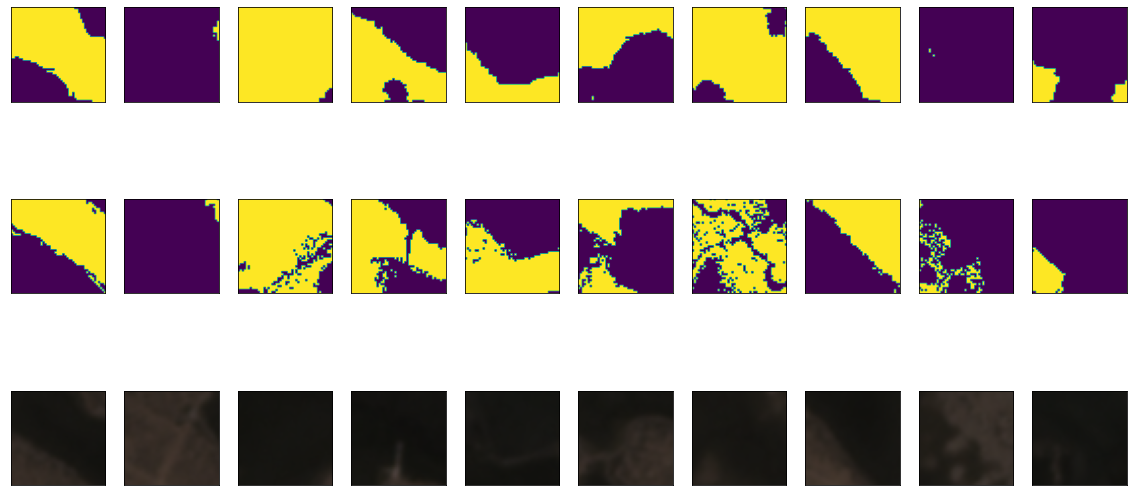

In [ ]:
import matplotlib.pyplot as plt

segmented_data = model.predict(hr_images_test)

print(segmented_data.shape)

n = 10  # how many digits we will display
plt.figure(3)
plt.figure(figsize=(20, 10))
for i in range(n):
    # display original

    ax = plt.subplot(3, n, i + 1)
    plt.imshow(np.argmax(segmented_data[i,:,:,:], axis=-1))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


    # display hidden layer representation
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(labels_test[i,:,:])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + n + n)
    plt.imshow(hr_images_test[i,:,:,0:3])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Training LR Model

In [ ]:
img_size = (16, 16)
num_classes = 2
batch_size = 32

# Free up RAM in case the model definition cells were run multiple times
keras.backend.clear_session()

# Build model
lr_model = get_model(img_size, num_classes)
lr_model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics = ['accuracy'])

In [ ]:
def rescale(array, shape):
    rescaled = []
    for i in range(array.shape[0]):
        rescaled.append(resize(array[i,:,:,:], shape, interpolation = cv2.INTER_AREA))
    return np.asarray(rescaled)

def rescale_labels(array, shape):
    rescaled = []
    for i in range(array.shape[0]):
        rescaled.append(resize(array[i,:,:], shape, interpolation = cv2.INTER_AREA))
    return np.asarray(rescaled)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


lr_rescaled_train = rescale(lr_images_train, (16,16))
lr_rescaled_test = rescale(lr_images_test, (16,16))

labels_rescaled_train = rescale_labels(labels_train, (16,16))
labels_rescaled_test = rescale_labels(labels_test, (16,16))

early_stopper = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=50, verbose=1, mode='min')
model_checkpoint =  ModelCheckpoint('lr_unet_checkpoint.h5', save_best_only = True)

history = lr_model.fit(lr_rescaled_train, labels_rescaled_train,
            epochs=500,
            validation_data=(lr_rescaled_test, labels_rescaled_test),
            callbacks=[early_stopper, model_checkpoint])

lr_model.load_weights('/content/lr_unet_checkpoint.h5')

Epoch 1/500
21/21 [==============================] - 7s 73ms/step - loss: 4.7062 - accuracy: 0.5836 - val_loss: 0.6333 - val_accuracy: 0.5201
Epoch 2/500
21/21 [==============================] - 1s 24ms/step - loss: 0.5690 - accuracy: 0.6934 - val_loss: 0.6203 - val_accuracy: 0.5277
Epoch 3/500
21/21 [==============================] - 1s 24ms/step - loss: 0.5680 - accuracy: 0.6749 - val_loss: 0.6641 - val_accuracy: 0.4847
Epoch 4/500
21/21 [==============================] - 0s 24ms/step - loss: 0.4191 - accuracy: 0.7216 - val_loss: 0.6503 - val_accuracy: 0.4942
Epoch 5/500
21/21 [==============================] - 0s 24ms/step - loss: 0.4508 - accuracy: 0.6978 - val_loss: 0.6772 - val_accuracy: 0.4508
Epoch 6/500
21/21 [==============================] - 0s 24ms/step - loss: 0.4167 - accuracy: 0.7088 - val_loss: 0.6584 - val_accuracy: 0.4984
Epoch 7/500
21/21 [==============================] - 1s 24ms/step - loss: 0.3812 - accuracy: 0.7325 - val_loss: 0.6965 - val_accuracy: 0.4215
Epoch 

(168, 48, 48, 2)


<Figure size 432x288 with 0 Axes>

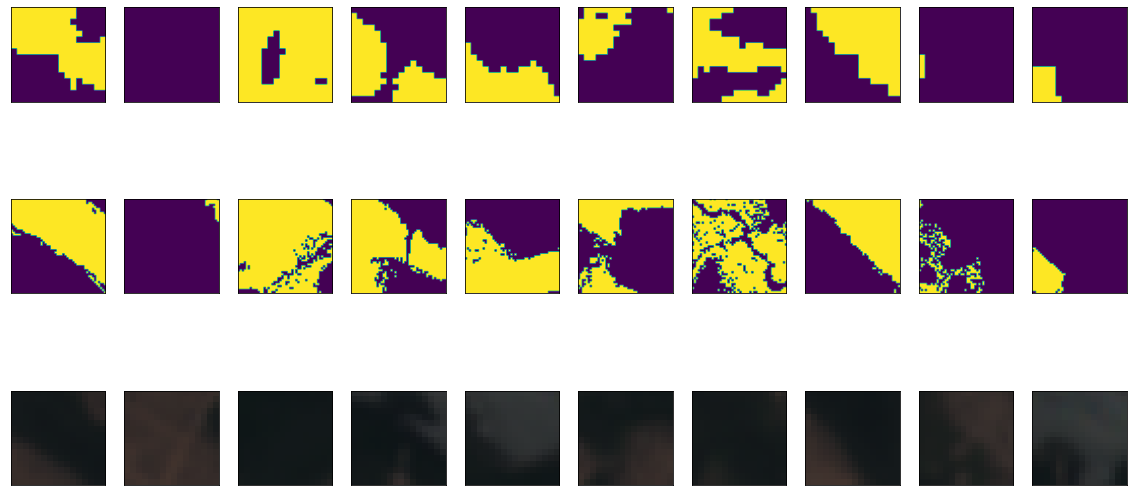

In [ ]:
import matplotlib.pyplot as plt

lr_segmented_data = rescale(lr_model.predict(lr_rescaled_test), (48,48))

print(segmented_data.shape)

n = 10  # how many digits we will display
plt.figure(3)
plt.figure(figsize=(20, 10))
for i in range(n):
    # display original

    ax = plt.subplot(3, n, i + 1)
    plt.imshow(np.argmax(lr_segmented_data[i,:,:,:], axis=-1))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


    # display hidden layer representation
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(labels_test[i,:,:])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + n + n)
    plt.imshow(lr_rescaled_test[i,:,:,0:3])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Loading SRCNN + Generating Data

In [ ]:
!cp /content/drive/MyDrive/srcnn/sr_checkpoint.h5 .

from keras.layers.core import Activation
from keras import Sequential
import tensorflow as tf
from tensorflow.keras import Model, Input, regularizers
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D, Add, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K

def PSNRLoss(y_true, y_pred):

    max_pixel = 1.0
    return (10.0 * K.log((max_pixel ** 2) / (K.mean(K.square(y_pred - y_true), axis=-1)))) / 2.303


srcnn = Sequential()
srcnn.add(Conv2D(64,9,padding='same',input_shape=(48,48,4)))
srcnn.add(Activation('relu'))
srcnn.add(Conv2D(32,1,padding='same'))
srcnn.add(Activation('relu'))
srcnn.add(Conv2D(4,5,padding='same'))
srcnn.compile(optimizer='adam', loss='mean_squared_error', metrics=[PSNRLoss])

srcnn.load_weights('/content/sr_checkpoint.h5')

In [ ]:
r_train = srcnn.predict(lr_images_train)
r_test = srcnn.predict(lr_images_test)


<Figure size 432x288 with 0 Axes>

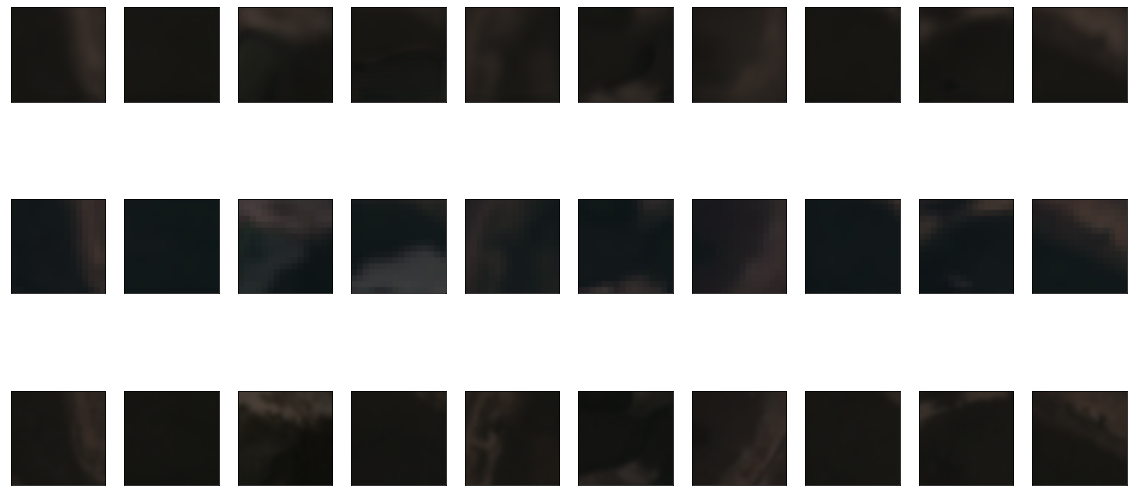

In [ ]:
n = 10  # how many digits we will display
plt.figure(3)
plt.figure(figsize=(20, 10))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(r_train[i,:,:,0:3])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display hidden layer representation
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(lr_images_train[i,:,:,0:3])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + n + n)
    plt.imshow(hr_images_train[i,:,:,0:3])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# SRUnet

In [ ]:
img_size = (48, 48)
num_classes = 2
batch_size = 32

# Free up RAM in case the model definition cells were run multiple times
keras.backend.clear_session()

# Build model
sr_model = get_model(img_size, num_classes)
sr_model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics = ['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


early_stopper = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=50, verbose=1, mode='min')
model_checkpoint =  ModelCheckpoint('srunet_checkpoint.h5', save_best_only = True)

history = sr_model.fit(r_train, labels_train,
            epochs=500,
            validation_data=(r_test, labels_test),
            callbacks=[early_stopper, model_checkpoint])

sr_model.load_weights('/content/srunet_checkpoint.h5')

Epoch 1/500
21/21 [==============================] - 6s 62ms/step - loss: 2.6334 - accuracy: 0.7624 - val_loss: 0.7389 - val_accuracy: 0.4197
Epoch 2/500
21/21 [==============================] - 1s 26ms/step - loss: 0.5449 - accuracy: 0.8300 - val_loss: 0.6795 - val_accuracy: 0.5833
Epoch 3/500
21/21 [==============================] - 1s 27ms/step - loss: 0.3442 - accuracy: 0.8617 - val_loss: 0.7259 - val_accuracy: 0.5239
Epoch 4/500
21/21 [==============================] - 1s 27ms/step - loss: 0.4899 - accuracy: 0.8524 - val_loss: 0.6916 - val_accuracy: 0.5182
Epoch 5/500
21/21 [==============================] - 1s 27ms/step - loss: 0.2845 - accuracy: 0.8840 - val_loss: 0.7069 - val_accuracy: 0.4704
Epoch 6/500
21/21 [==============================] - 1s 27ms/step - loss: 0.2906 - accuracy: 0.8819 - val_loss: 0.6867 - val_accuracy: 0.5480
Epoch 7/500
21/21 [==============================] - 1s 26ms/step - loss: 0.2688 - accuracy: 0.8887 - val_loss: 0.6874 - val_accuracy: 0.5583
Epoch 

(168, 48, 48, 2)


<Figure size 432x288 with 0 Axes>

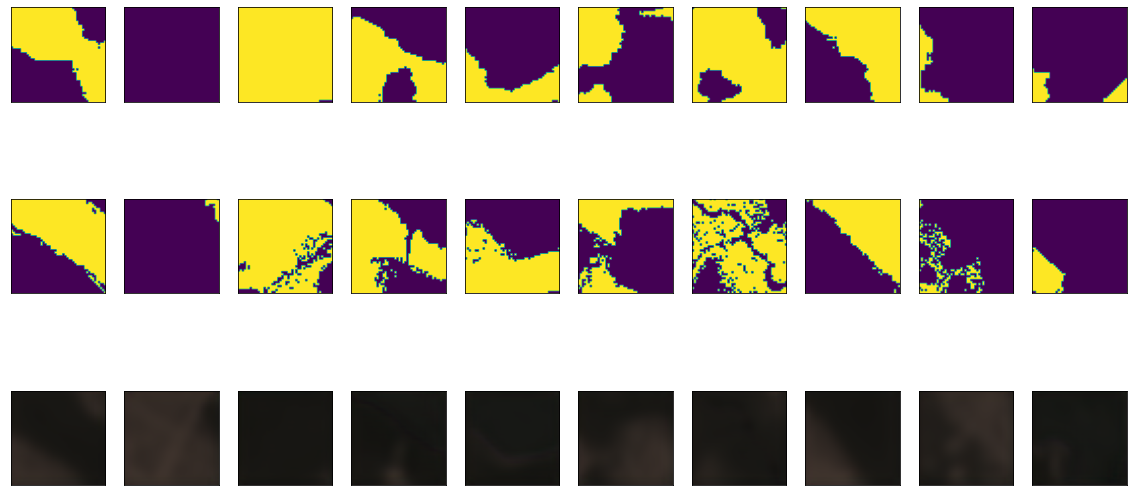

In [ ]:
import matplotlib.pyplot as plt

r_segmented_data = sr_model.predict(r_test)

print(r_segmented_data.shape)

n = 10  # how many digits we will display
plt.figure(3)
plt.figure(figsize=(20, 10))
for i in range(n):
    # display original

    ax = plt.subplot(3, n, i + 1)
    plt.imshow(np.argmax(r_segmented_data[i,:,:,:], axis=-1))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


    # display hidden layer representation
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(labels_test[i,:,:])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + n + n)
    plt.imshow(r_test[i,:,:,0:3])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Final Results

In [ ]:
r_segmented_data = np.argmax(r_segmented_data, axis=-1)
segmented_data = np.argmax(segmented_data, axis=-1)
lr_segmented_data = np.argmax(lr_segmented_data, axis=-1)


In [ ]:
r_segmented_data.shape

(168, 48, 48)

In [ ]:
from sklearn.metrics import jaccard_score

y_test = labels_test.flatten()

y_pred_r = r_segmented_data.flatten()
 
y_pred_hr = segmented_data.flatten()

y_pred_lr = lr_segmented_data.flatten()



In [ ]:
from sklearn.metrics import confusion_matrix
def pixel_iou(y_true,y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    iou = tp / (tp + fn + fp)
    return iou

For Standard Planetscope Imagery

In [ ]:
pixel_iou(y_test, y_pred_hr)

0.5942534084495886

For Upscaled Imagery

In [ ]:
pixel_iou(y_test, y_pred_r)

0.5708565179633978

For Planetscope Imagery

In [ ]:
pixel_iou(y_test, y_pred_lr)

0.49637550768598016